In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.gridspec import GridSpec
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from matplotlib.colors import LinearSegmentedColormap, Normalize

# colors_p = [rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),rgb_to_hex(255,255,255),'#BD66A7','#BD66A7','#BDBDBD','#2D7811']
colors_p = ['#BD66A7','#BDBDBD','#2D7811']
cmap_p = LinearSegmentedColormap.from_list('my_cmap', colors_p, gamma=1)

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
color_list = color_list*2

In [3]:
# geopandas 맵 데이터 불러오기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 현상
# plt.rcParams['font.family'] = 'NamuBaraunGothic' # 한글폰트 전역 설정
path = '/home/users/YongsungKwon/workplace/Yongpyter/dataset/tuberculosis/data/'
kr_sgg = gpd.read_file(path+'korea_map/korea_sigungu/',encoding='cp949')
# kr_sido = kr_sido.drop(7)
kr_sgg = kr_sgg.reset_index()
sido_cd=pd.read_csv(path+'korea_map/sido_code.csv')
kr_sido = gpd.read_file(path+'korea_map/TL_SCCO_CTPRVN',encoding='cp949')
kr_sido = kr_sido.reset_index()

In [4]:
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')


In [5]:
h_noage_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/no_age/opt_E_h/2022MC_noage_h_opt.csv',sep=',')
h_age_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/2022MC_age_h_opt_a_20.csv')
h = data['h']
y = (h_age_opt['h'] - h_noage_opt['h'])/h
rho = data['N']/data['A']
etatilde = (data['h']/data['A'])/(np.abs(np.log(data['D']/data['N'])))
rhoover = rho/etatilde
data['rhoover']=rhoover
data['y']=y

In [6]:
def search_sido(id):
    # sc=kr_sgg['SIG_CD'][id][:2]
    sc=id[:2]
    # print(sc)
    return list(sido_cd[sido_cd['cd']==int(sc)]['sido'])[0]

In [7]:
y_list = []
r_list = []
for l, e in kr_sgg.iterrows():
	sido = search_sido(e['SIG_CD'])
	sigungu = e['SIG_KOR_NM']

	if len(sigungu) >= 5:
		sigungu = sigungu[:3]

	# data 필터링
	dt = data[(data['sido'] == sido) & (data['sigungu'] == sigungu)]

	# 필터링 후 데이터가 없을 경우 NaN 추가
	if dt.empty:
		y_list.append(np.nan)#np.nan
		r_list.append(np.nan)
	else:
		y_list.append(dt['y'].iloc[0])
		r_list.append(dt['rhoover'].iloc[0])
		

# 결과를 kr_sgg에 추가
kr_sgg['y'] = y_list
kr_sgg['rhoover'] = r_list

# Figures

/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/tmp/ipykernel_2957121/1544623320.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


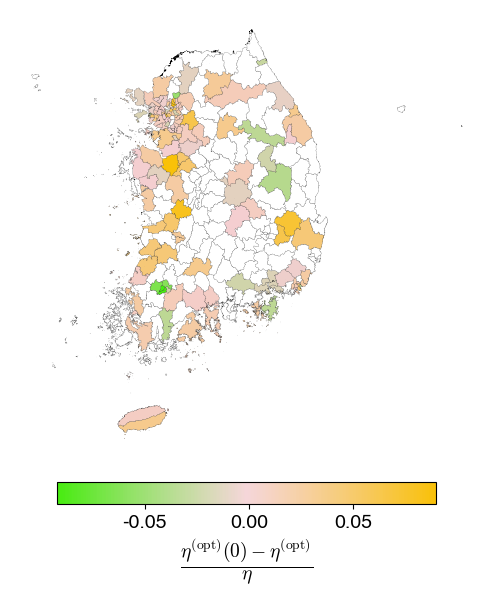

In [8]:


fig = plt.figure()
ax = fig.add_subplot()

colors = ["#47EC10", "#F4CED2D2", "#F9C108"]#, '#FFFFFF'
norm = Normalize(vmin=min(kr_sgg['y']), vmax=max(kr_sgg['y']))
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, gamma=1)

# 지도 그리기
kr_sgg.plot(column='y', ec='k', cmap=cmap, legend=False, norm=norm, alpha=1, linewidth=0.1, ax=ax)
kr_sgg[kr_sgg['y'].isna()].plot(ec='k', color='#FFFFFF', alpha=1, linewidth=0.1, ax=ax)

# 축 제거
ax.axis('off')

# ✅ Colorbar 축을 현재 ax에 맞게 inset_axes로 생성
cbar_ax = inset_axes(ax, width='80%', height='5%', loc='lower center',
                     bbox_to_anchor=(0, -0.1, 1, 1), bbox_transform=ax.transAxes, borderpad=0)

# 컬러바 생성
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$\frac{\eta^\mathrm{(opt)}(0)-\eta^\mathrm{(opt)}}{\eta}$', fontsize=20)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()


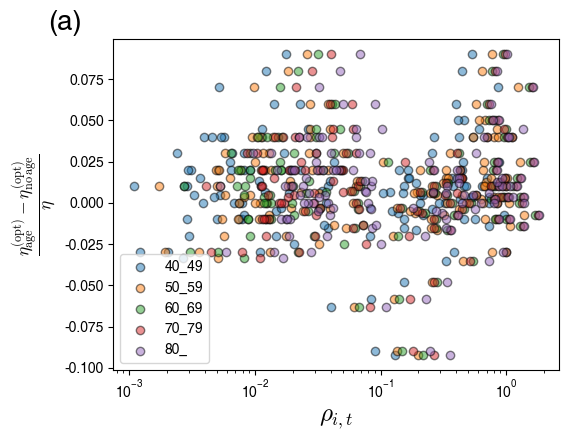

In [167]:
title_size=20
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3,3, height_ratios=[1,1,1])
age_list = ['40_49','50_59','60_69', '70_79', '80_']

cm = ['b','g','y','orange','r']
numbering = ['a','b','c','d','e','f','g','h','i']
cc=0
year = '2022'
# year=2014
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')

h_no_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/no_age/opt_E_h/'+str(year)+'MC_noage_h_opt.csv')
h_age_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(15)+'.csv')
y = ((h_age_opt['h'] -h_no_opt['h'])/ data['h']).values
ax=fig.add_subplot(gs[cc//3, cc%3])
for age in age_list:
	# x = data['RN80_']
	x = data['RN'+age].values * data['N'].values / data['A'].values
	
	ax.scatter(x,y, ec='k', alpha=0.5, label=age)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\rho_{i,t}$',size=18)
ax.set_ylabel(r'$\frac{\eta^\mathrm{(opt)}_\mathrm{age}-\eta^\mathrm{(opt)}_\mathrm{no\,age}}{\eta}$',size=18)

ax.legend()
ax.text(-0.05-0.06, 1.05, '('+numbering[cc]+')', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)

cc+=1
plt.tight_layout()
plt.show()

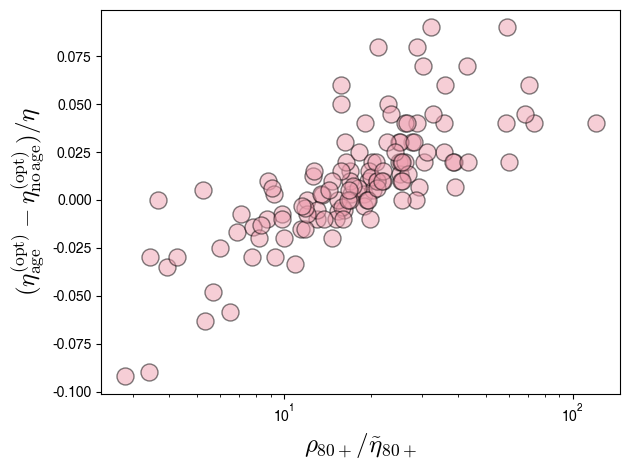

In [168]:
title_size=20
# fig = plt.figure(figsize=(15, 12))
# gs = GridSpec(3,3, height_ratios=[1,1,1])
age_list = ['40_49','50_59','60_69', '70_79', '80_']

cm = ['b','g','y','orange','r']
numbering = ['a','b','c','d','e','f','g','h','i']

h_no_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/no_age/opt_E_h/'+str(year)+'MC_noage_h_opt.csv')
h_age_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(15)+'.csv')
y = ((h_age_opt['h'] -h_no_opt['h'])/ data['h']).values
x = (data['N']*data['RN80_']/data['A'])/data['eta_tilde80_']

plt.scatter(x,y, ec='k', c="#EE9EAF",alpha=0.5,s=150)
plt.xscale('log')
# ax.set_yscale('log')
plt.xlabel(r'$\rho_{\mathrm{80+}}/ \tilde\eta_{\mathrm{80+}}$',size=18)
plt.ylabel(r'$(\eta^\mathrm{(opt)}_\mathrm{age}-\eta^\mathrm{(opt)}_\mathrm{no\,age})/\eta$',size=18)

# ax.text(-0.05-0.06, 1.05, '('+numbering[cc]+')', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/newly_fig/etaratio_rho80etatilde80.pdf',format='pdf',transparent=True)
plt.show()

In [169]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환

def E_age(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	E_age_list=[]
	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E_age_list.append((a * t[i] + b) * N_t * phi_t)  # row-wise 연산

	return E_age_list  # 각 row별 E 값이 담긴 Series 반환

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

def find_min_max_a(year):
	# 데이터 로드
	data = pd.read_csv(f'/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/{year}_40.txt', sep=',')

	a_list = np.linspace(-2, 1, 31)
	a_min = None
	a_max = None

	prev_val_min = None
	prev_val_max = None

	for a_i, a in enumerate(a_list):
		# a_i 오타 수정 (ai → a_i)
		h_opt = pd.read_csv(f'/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/{year}MC_age_h_opt_a_{a_i}.csv')

		b_val = b(data, a)

		# 조건 1: a*5 + b crosses 0 from negative → positive
		val_min = a * 5 + b_val
		if prev_val_min is not None and prev_val_min < 0 and val_min >= 0 and a_min is None:
			a_min = a_i

		# 조건 2: a*1 + b crosses 0 from positive → negative
		val_max = a * 1 + b_val
		if prev_val_max is not None and prev_val_max >= 0 and val_max < 0:
			a_max = a_i - 1  # 직전 인덱스

		prev_val_min = val_min
		prev_val_max = val_max

	return a_min, a_max

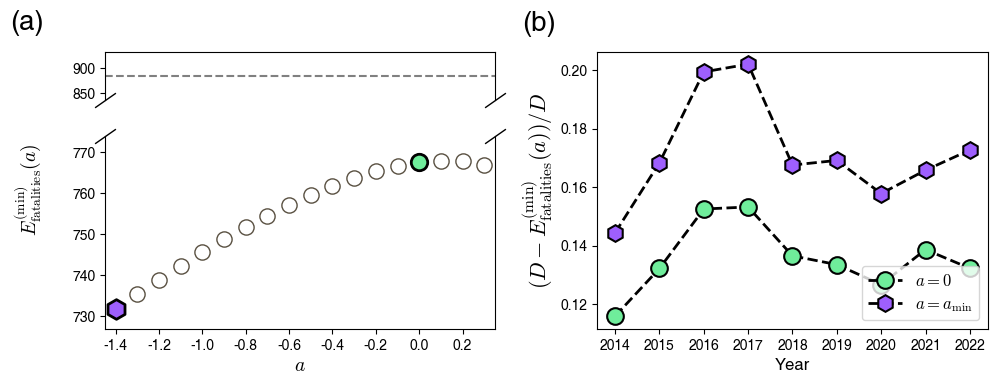

In [12]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1,4])
save_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'

E_a_min=[]
E_a_max=[]
E_a_0=[]
D_list=[]
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	a_min, a_max = find_min_max_a(year)
	for i in range(31):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	E_a_min.append(E_list[a_min])
	E_a_max.append(E_list[a_max])
	E_a_0.append(E_list[20])
	D_list.append(sum(data['D'] *data.iloc[:,19:24].sum(axis=1)))
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
ai=0
E_list=[]
for i in range(31):
	E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
	E_list.append(E_[-1])
	ai+=1
D_40 = sum(data['D'] *data.iloc[:,19:24].sum(axis=1))
a_min, a_max = find_min_max_a(year)

ax0 = fig.add_subplot(gs[0, 0])
ax0.axhline(D_40, color='gray', linestyle='--', linewidth=1.5)
ax0.text(title_pos[0]-0.05, title_pos[1]+0.5, '('+title_list[0]+')', fontsize=title_size,  ha='center', va='center',transform=ax0.transAxes)
ax0.get_xaxis().set_visible(False)
ax0.tick_params(axis='y', labelsize=10)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(np.linspace(-2,1,31), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
ax.scatter(np.linspace(-2,1,31)[20], E_list[20], marker='o', ec='k',s=140,c=rgb_to_hex(111,237,155),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_001_], E_list[i_001_], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
ax.scatter(np.linspace(-2,1,31)[a_min], E_list[a_min], marker='h', ec='k',s=200,c=rgb_to_hex(158,95,253),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_003], E_list[i_003], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253))
ax.set_xlim(-1.45, 0.35)
ax.set_ylim(727, 774)
ax.tick_params(axis='x', labelsize=10, labelrotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel(r'$a$', size=14)

fig.text(0.01, 0.50, r'$E^{\mathrm{(min)}}_\mathrm{fatalities}(a)$', va='center', rotation = 'vertical', fontsize = 14)
ax0.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# how big to make the diagonal lines in axes coordinates
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)

ax1=fig.add_subplot(gs[:,1])
y_0 = (np.array(D_list) - np.array(E_a_0))/np.array(D_list)
y_min = (np.array(D_list)-np.array(E_a_min))/np.array(D_list)
ax1.plot(range(2014,2023), y_0, marker='o', mfc=rgb_to_hex(111,237,155) , mew=1.5,c='k', linestyle='--', linewidth=2, ms=12, label=r'$a=0$')
ax1.plot(range(2014,2023), y_min, marker='h', c='k', mew=1.5,ms=12 , mfc=rgb_to_hex(158,95,253), linestyle='--', linewidth=2, label=r'$a=a_\mathrm{min}$')
ax1.set_ylabel(r'$(D-E^{\mathrm{(min)}}_\mathrm{fatalities}(a))/ D$', size=16)
ax1.set_xlabel(r'Year', size=12)
ax1.tick_params(axis='x', labelsize=10, labelrotation=0)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc=4, fontsize='large')
ax1.text(title_pos[0], title_pos[1], '('+title_list[1]+')', fontsize=title_size,  ha='center', va='center',transform=ax1.transAxes)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/a_E_year.pdf',format='pdf', transparent=True)
plt.show()

In [13]:
year = 2022

E_age_a = np.zeros([31, 5])
ai_min, ai_max = find_min_max_a(year)
for ai in range(31):
    #ai = 20# 20: 0 
    a = np.linspace(-2,1,31)[ai]
    data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt',sep=',')
    h_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')

    E_ = E_age(data, h_pd=h_opt,a=a,b=b(data,a=a))
    E_age_a[ai] = np.sum(E_,axis=1)

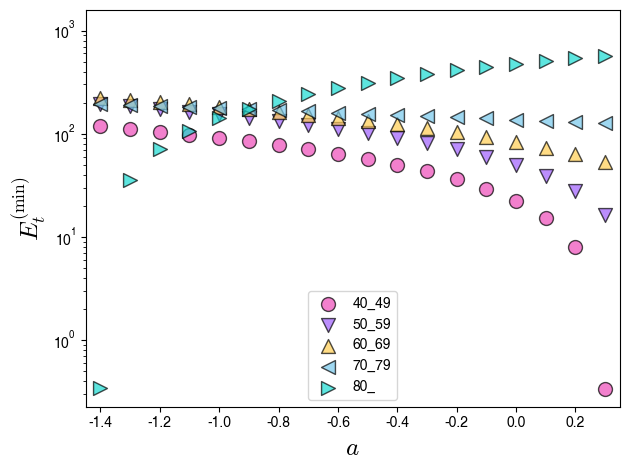

In [14]:
age = ['40_49', '50_59', '60_69', '70_79', '80_']
for age_i in range(5):
    plt.scatter(np.linspace(-2,1,31), E_age_a[:,age_i],ec='k',c=color_list[age_i],s=100,marker=mark[age_i], label=age[age_i],alpha=0.7)

plt.xlim(np.linspace(-2,1,31)[a_min]-0.05, np.linspace(-2,1,31)[a_max]+0.05)
plt.xlim(-1.45, 0.35)
# plt.ylim(10, 610)
plt.yscale('log')
plt.xlabel(r'$a$',size=18)
plt.ylabel(r'$E^\mathrm{(min)}_t$',size=18)
plt.legend()
plt.tight_layout()
plt.show()

/miniconda3/envs/YongsungKwon_env_py310/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


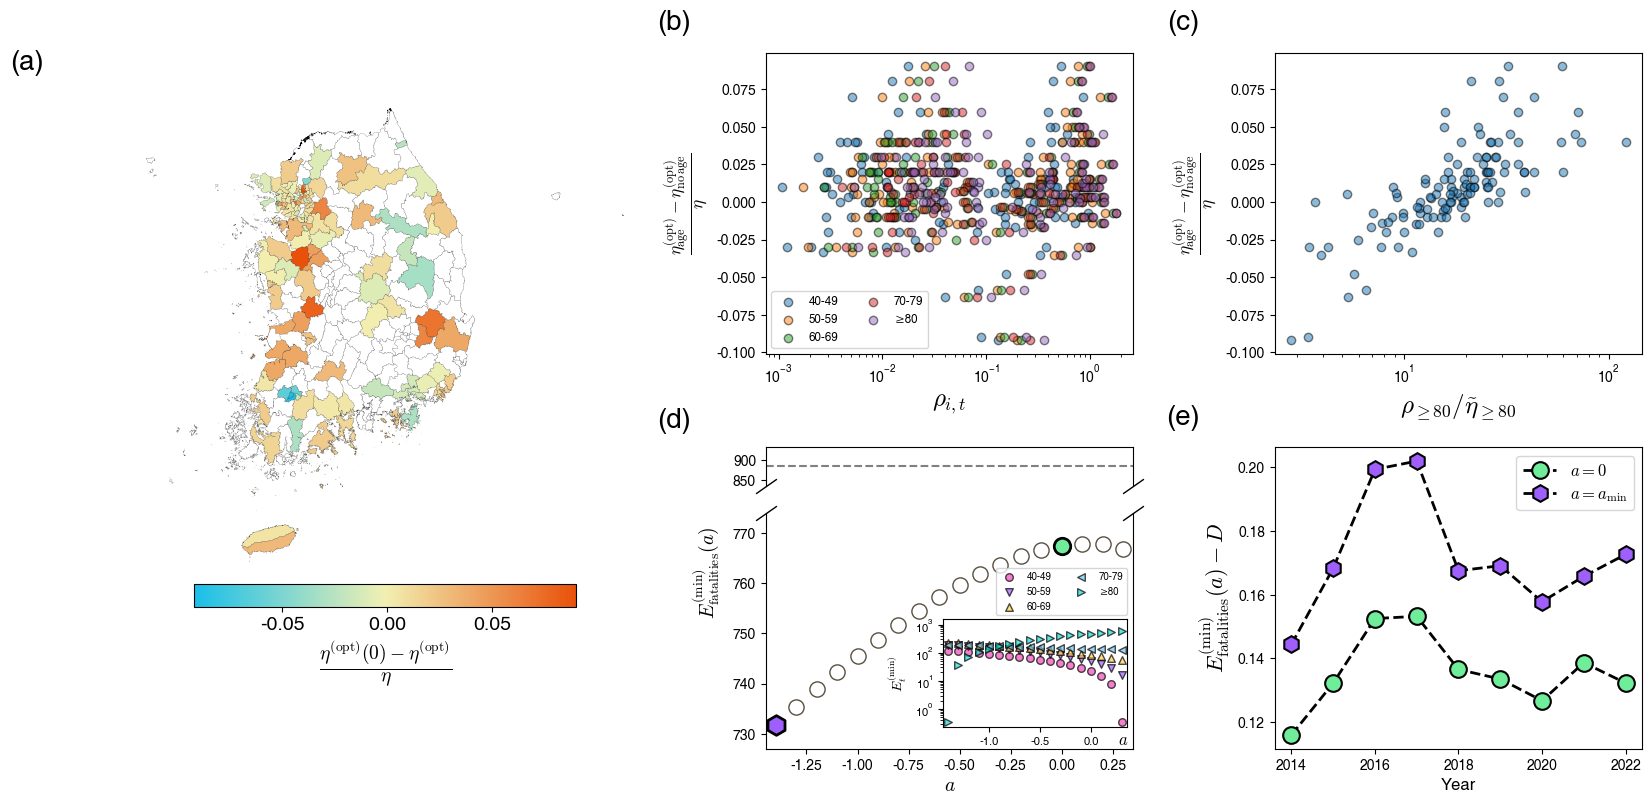

In [184]:
fig = plt.figure(figsize=(17, 8))
gs = GridSpec(11,3, width_ratios=[1.3,1,1])#, height_ratios=[5,1,4]
title_pos=[-0.25, 1.1]

"""
(a)
"""
ax = fig.add_subplot(gs[:9,0])
colors = ["#19BFE9", "#F2F0B2", "#E9510A"]#, '#FFFFFF'
norm = Normalize(vmin=min(kr_sgg['y']), vmax=max(kr_sgg['y']))
cmap = LinearSegmentedColormap.from_list('my_cmap', colors, gamma=1)
kr_sgg.plot(column='y', ec='k', cmap=cmap, legend=False, norm=norm, alpha=1, linewidth=0.1, ax=ax)
kr_sgg[kr_sgg['y'].isna()].plot(ec='k', color='#FFFFFF', alpha=1, linewidth=0.1, ax=ax)
ax.set_xlim(kr_sgg.total_bounds[0], kr_sgg.total_bounds[2]+1000)
ax.set_ylim(kr_sgg.total_bounds[1], kr_sgg.total_bounds[3])
ax.axis('off')
cbar_ax = inset_axes(ax, width='80%', height='5%', loc='lower center',
                     bbox_to_anchor=(0, -0.1, 1, 1), bbox_transform=ax.transAxes, borderpad=0)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'$\frac{\eta^\mathrm{(opt)}(0)-\eta^\mathrm{(opt)}}{\eta}$', fontsize=20)
cbar.ax.tick_params(labelsize=14)
ax.text(title_pos[0], title_pos[1], '('+title_list[0]+')', fontsize=title_size,  ha='center', va='center',transform=ax.transAxes)
"""
(b)
"""
ax=fig.add_subplot(gs[0:5,1])
age_listt = ['40-49', '50-59', '60-69', '70-79', '\u226580']
c=0
for age in age_list:
    x = data['RN'+age].values * data['N'].values / data['A'].values
    ax.scatter(x,y, ec='k', alpha=0.5, label=age_listt[c])
    c+=1
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\rho_{i,t}$',size=18)
ax.set_ylabel(r'$\frac{\eta^\mathrm{(opt)}_\mathrm{age}-\eta^\mathrm{(opt)}_\mathrm{no\,age}}{\eta}$',size=18)
ax.legend(loc=3,fontsize='small',ncol=2)
ax.text(title_pos[0], title_pos[1], '('+title_list[1]+')', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
"""
(c)
"""
h_no_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/no_age/opt_E_h/'+str(year)+'MC_noage_h_opt.csv')
h_age_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_'+str(15)+'.csv')
y = ((h_age_opt['h'] -h_no_opt['h'])/ data['h']).values
x = (data['N']*data['RN80_']/data['A'])/data['eta_tilde80_']
ax=fig.add_subplot(gs[0:5, 2])
ax.scatter(x,y, ec='k', alpha=0.5)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\rho_{\geq 80}/ \tilde\eta_{\geq 80}$',size=18)
ax.set_ylabel(r'$\frac{\eta^\mathrm{(opt)}_\mathrm{age}-\eta^\mathrm{(opt)}_\mathrm{no\,age}}{\eta}$',size=18)
ax.text(title_pos[0], title_pos[1], '('+title_list[2]+')', fontsize=title_size, ha='center', va='center', transform=ax.transAxes)
"""
(d)
"""
ax0 = fig.add_subplot(gs[6, 1])
ax0.axhline(D_40, color='gray', linestyle='--', linewidth=1.5)
ax0.text(title_pos[0], title_pos[1]+0.6, '(d)', fontsize=title_size,  ha='center', va='center',transform=ax0.transAxes)
ax0.get_xaxis().set_visible(False)
ax0.tick_params(axis='y', labelsize=10)

ax = fig.add_subplot(gs[7:, 1])
ax.scatter(np.linspace(-2,1,31), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
ax.scatter(np.linspace(-2,1,31)[20], E_list[20], marker='o', ec='k',s=140,c=rgb_to_hex(111,237,155),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_001_], E_list[i_001_], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
ax.scatter(np.linspace(-2,1,31)[a_min], E_list[a_min], marker='h', ec='k',s=200,c=rgb_to_hex(158,95,253),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_003], E_list[i_003], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253))
ax.set_xlim(-1.45, 0.35)
ax.set_ylim(727, 774)
ax.tick_params(axis='x', labelsize=10, labelrotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel(r'$a$', size=14)
# how big to make the diagonal lines in axes coordinates
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
fig.text(0.4, 0.30, r'$E^{\mathrm{(min)}}_\mathrm{fatalities}(a)$', va='center', rotation = 'vertical', fontsize = 14)
ax0.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
"""
(d) inset
"""
# 예: 기존 큰 축 ax 안에 inset 축 만들기
inset_ax = inset_axes(ax, width="25%", height="23%", loc='upper right',
                      bbox_to_anchor=(-0.98, -1.39, 2, 2),
                      bbox_transform=ax.transAxes,
                      borderpad=1)

# scatter plot을 inset 축에 그림
age = ['40-49', '50-59', '60-69', '70-79', '\u226580']
for age_i in range(5):
    inset_ax.scatter(np.linspace(-2, 1, 31),
                     E_age_a[:, age_i],
                     ec='k',
                     c=color_list[age_i],
                     s=30,
                     marker=mark[age_i],
                     label=age[age_i],
                     alpha=0.7)

inset_ax.set_xlim(np.linspace(-2, 1, 31)[a_min] - 0.05,
                  np.linspace(-2, 1, 31)[a_max] + 0.05)
inset_ax.set_yscale('log')
# inset_ax.set_xlabel(r'$a$', size=10)
inset_ax.set_ylabel(r'$E^\mathrm{(min)}_t$', size=10)
inset_ax.tick_params(labelsize=8)
inset_ax.legend(fontsize=7, loc='lower center',  bbox_to_anchor=(0.645, 0.99),frameon=True,ncol=2)
inset_ax.text(0.98, -0.12, r'$a$', fontsize=12,  ha='center', va='center',transform=inset_ax.transAxes)
"""
(e)
"""
ax1=fig.add_subplot(gs[6:,2])
y_0 = (np.array(D_list) - np.array(E_a_0))/np.array(D_list)
y_min = (np.array(D_list)-np.array(E_a_min))/np.array(D_list)
ax1.plot(range(2014,2023), y_0, marker='o', mfc=rgb_to_hex(111,237,155) , mew=1.5,c='k', linestyle='--', linewidth=2, ms=12, label=r'$a=0$')
ax1.plot(range(2014,2023), y_min, marker='h', c='k', mew=1.5,ms=12 , mfc=rgb_to_hex(158,95,253), linestyle='--', linewidth=2, label=r'$a=a_\mathrm{min}$')
ax1.set_ylabel(r'$E^{\mathrm{(min)}}_\mathrm{fatalities}(a)- D$', size=16)
ax1.set_xlabel(r'Year', size=12)
ax1.tick_params(axis='x', labelsize=10, labelrotation=0)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc=1, fontsize='large')
ax1.text(title_pos[0], title_pos[1], '(e)', fontsize=title_size,  ha='center', va='center',transform=ax1.transAxes)


# plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.96, top=0.95, bottom=0.08, wspace=0.35, hspace=0.72)
plt.show()

$\ge$